In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Pre-processing**

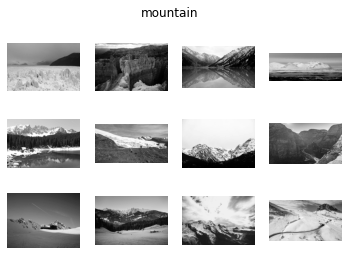

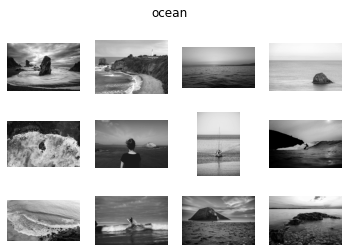

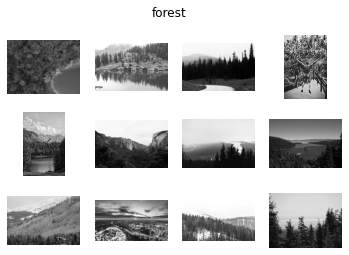

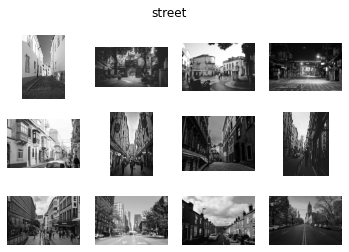

In [ ]:
# display part of pictures
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img,cmap='gray')
    plt.show()


Resize pictures to equate height and width for each picture

In [ ]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 32
# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) 
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0],0)
    #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(WIDTH, HEIGHT))  # .flatten()
    data.append(image)     
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/MyDrive/Intel dataset/street/street1970.jpg', 3], ['/content/drive/MyDrive/Intel dataset/street/street1098.jpg', 3], ['/content/drive/MyDrive/Intel dataset/ocean/ocean43.jpg', 1], ['/content/drive/MyDrive/Intel dataset/forest/forest1887.jpg', 2], ['/content/drive/MyDrive/Intel dataset/forest/forest1751.jpg', 2], ['/content/drive/MyDrive/Intel dataset/forest/forest1392.jpg', 2], ['/content/drive/MyDrive/Intel dataset/mountain/mountain342.jpg', 0], ['/content/drive/MyDrive/Intel dataset/forest/forest803.jpg', 2], ['/content/drive/MyDrive/Intel dataset/forest/forest430.jpg', 2], ['/content/drive/MyDrive/Intel dataset/ocean/ocean1015.jpg', 1]]


Normalization

In [ ]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)

train-validation-test splitting

In [ ]:
#80% for training and 20% for testing
#option 1: make split for each category (stratified sampling)
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.15,random_state=3011,stratify=labels)

#option 2: split all data together
#(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=3011)

In [ ]:
#further split train data to get validation dataset
(trainX,validationX,trainY,validationY)=train_test_split(trainX,trainY,test_size=15/85,random_state=3011,stratify=trainY)
validationY=np_utils.to_categorical(validationY,no_cate)
trainY=np_utils.to_categorical(trainY,no_cate)
testY=np_utils.to_categorical(testY,no_cate)


In [ ]:
trainX=np.expand_dims(trainX,axis=3)
validationX=np.expand_dims(validationX,axis=3)
testX=np.expand_dims(testX,axis=3)

In [ ]:
print(trainX.shape)
print(validationX.shape)
print(testX.shape)
print(trainY.shape)
print(validationY.shape)
print(testY.shape)

(5600, 32, 32, 1)
(1200, 32, 32, 1)
(1200, 32, 32, 1)
(5600, 4)
(1200, 4)
(1200, 4)


# **Model Fitting 2: LeNet**


In [ ]:
model =Sequential()
model.add(Convolution2D(filters=6, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(32,32,1)))
model.add(MaxPooling2D())
model.add(Convolution2D(filters=16, kernel_size=(3, 3), activation='relu',padding='valid'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=no_cate, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
BS = 96
EPOCHS = 100
opt =Adam(learning_rate=0.0001)

In [ ]:
# First model with max pooling
model.build
model.compile(loss= "categorical_crossentropy", optimizer= opt, metrics= ["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 6)         60        
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [ ]:
# Train model
history= model.fit(trainX, trainY, validation_data= (testX, testY), batch_size= BS,
              epochs= EPOCHS, verbose=1)

# Evaluate the train and test data
scores_train = model.evaluate(trainX, trainY, verbose= 1)
scores_test = model.evaluate(testX, testY, verbose= 1)

print("\nModel with Max Pool Accuracy on Train Data: %.2f%%" % (scores_train[1]*100))
print("Model with Max Pool Accuracy on Test Data: %.2f%%" % (scores_test[1]*100))

Epoch 1/100
59/59 [==============================] - 3s 37ms/step - loss: 1.3618 - accuracy: 0.3070 - val_loss: 1.3170 - val_accuracy: 0.4258
Epoch 2/100
59/59 [==============================] - 2s 35ms/step - loss: 1.2473 - accuracy: 0.4616 - val_loss: 1.1587 - val_accuracy: 0.4850
Epoch 3/100
59/59 [==============================] - 2s 35ms/step - loss: 1.1321 - accuracy: 0.5064 - val_loss: 1.0840 - val_accuracy: 0.5508
Epoch 4/100
59/59 [==============================] - 2s 34ms/step - loss: 1.0844 - accuracy: 0.5518 - val_loss: 1.0530 - val_accuracy: 0.5542
Epoch 5/100
59/59 [==============================] - 2s 34ms/step - loss: 1.0587 - accuracy: 0.5598 - val_loss: 1.0266 - val_accuracy: 0.5825
Epoch 6/100
59/59 [==============================] - 2s 34ms/step - loss: 1.0366 - accuracy: 0.5734 - val_loss: 1.0147 - val_accuracy: 0.5900
Epoch 7/100
59/59 [==============================] - 2s 35ms/step - loss: 1.0155 - accuracy: 0.5795 - val_loss: 0.9928 - val_accuracy: 0.5808
Epoch 

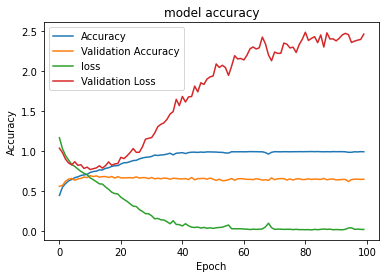

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
model.evaluate(testX,testY)

38/38 [==============================] - 0s 7ms/step - loss: 2.4632 - accuracy: 0.6508


[2.463163375854492, 0.6508333086967468]